<a href="https://colab.research.google.com/github/fideslynn/food-sales-predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions
**by Fides Gastanes - Lynn**


This notebook was made to use data science techniques in predicting the future sales of products at different retail establishments.

To do this, we shall use sales data derived from several stores selling varied kinds of merchandise. 

Based on the predictive model that we shall build, we will try to understand what qualities and factors contribute to consumer acquisition of goods at different stores. 

Ultimately, our aim is to determine specific factors that can bring about an increase in sales.





## Importing, mounting and loading the dataset




In [1]:
# To mount data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# To import pandas and pyplot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# To load dataset
filename = '/content/drive/MyDrive/CODING_DOJO/DATA_SCIENCE_BOOTCAMP/PROJECT 1 - Food Sales Predictions/sales_predictions.csv'
df = pd.read_csv(filename)

In [4]:
# To check the first five rows of the file

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We have succesfully imported and loaded the dataset.

## Exploring the dataset

In [5]:
# To determine how many rows and columns

df.shape

(8523, 12)

There are 8,523 rows and 12 columns.

In [6]:
# What are the datatypes of each variable?

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*    We have 4 float type of variables, 7 object and 1 integer type.

*   Even though the `Outlet_Establishment_Year` column is an integer type, we shall consider it as a categorical feature since the numbers in the said column represent a frame of time.


### Cleaning the data

In [7]:
# To determine the number of duplicate rows

len(df[df.duplicated()])


0

There are no duplicate rows in the dataset.

In [8]:
# To identify missing values

df.isnull().value_counts()


Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales
False            False        False             False            False      False     False              False                      False        False                 False        False                4650
                                                                                                                                    True         False                 False        False                2410
                 True         False             False            False      False     False              False                      False        False                 False        False                1463
dtype: int64

*    The `Item_Weight` and `Outlet_Size` columns both have missing values.

*   The number of rows that have NaN values in the `Outlet_Size` column is 2,410.

*   The number of rows that have null values in the `Item_Weight` column is 1,463.

*   The total number of rows that have NaN values is 3,873.

In [9]:
# To check what percentage of the total dataset has missing values

df.isnull().sum()/df.shape[0] *100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

`Item_Weight` missing values make up 17% of the total number of values, while the missing values in Outlet_Size comprise of 28% of the total. 

That's 45% all in all or almost half of the total data. 

This is why it will be unwise to just drop the rows containing null values. Even though this is the easiest route, this will heavily decrease the strength of the information that we will use to make predictions with.

Instead, we shall impute the missing values in order to make sure that we have a solid foundation for making good predictions.

#### Imputation for Numerical Feature

In [10]:
# To sort the Item_Identifier column

df = df.sort_values(by=['Item_Identifier'], ascending=True)
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


After sorting out the `Item_Identifier` column, we see that there are multiple rows containing the same Item ID. We also see that the corresponding item weights for some of the Item ID's are missing.

However, there are Item ID's that do have item weights logged. The item weight values are repeated consistenly for every Item ID.

We can therefore confidently use the item weight values from the non-null item weight rows that correspond to a unique Item ID.

If we sort the `Item_Identifier` column in an ascending manner, we see that the first item of each unique Item ID has an item weight logged. Therefore, we can use the forward fill method in filling out the missing values in the `Item_Weight` column.


In [11]:
# To check Item_Weight missing values

missing_Item_Weight = df['Item_Weight'].isna()

# To look at the rows that contain NaN for Item_Weight column

df.loc[missing_Item_Weight, :]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
6179,DRA59,NaN,Regular,0.223985,Soft Drinks,186.2924,OUT019,1985,Small,Tier 1,Grocery Store,555.2772
6057,DRA59,NaN,Regular,0.127308,Soft Drinks,186.6924,OUT027,1985,Medium,Tier 3,Supermarket Type3,7033.5112
3733,DRB01,NaN,Low Fat,0.081841,Soft Drinks,190.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,569.2590
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,NCZ18,NaN,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
4523,NCZ30,NaN,LF,0.026058,Household,121.9098,OUT027,1985,Medium,Tier 3,Supermarket Type3,3374.2744
2084,NCZ53,NaN,Low Fat,0.024359,Health and Hygiene,190.4214,OUT027,1985,Medium,Tier 3,Supermarket Type3,5652.6420
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


In [12]:
# To fill out missing item weight values based on the previous item weights using with Item_Identifier column sorted ascendingly


df['Item_Weight'].fillna(method='ffill', inplace = True)

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


We put `inplace = True` so that the `Item_Weight` data will remain updated from now on.

In [13]:
# To check if Item_Weight column still has missing values

df['Item_Weight'].isna().sum()

0

There are no more missing `Item_Weight` values.


Normally, for numerical features, we impute using the `mean` function. But I personally chose this method as there is available concrete data to base the values that we will be using to fill out the missing data.






#### Imputation for Categorical Feature

In [14]:
# To check Outlet_Size missing values

Outlet_Size_missing = df['Outlet_Size'].isna()

# Determines the rows that contain NaN values in this column

df.loc[Outlet_Size_missing, :]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076
...,...,...,...,...,...,...,...,...,...,...,...,...
411,NCZ42,10.50,Low Fat,0.000000,Household,238.3248,OUT010,1998,NaN,Tier 3,Grocery Store,711.0744
1115,NCZ42,10.50,Low Fat,0.011352,Household,236.5248,OUT017,2007,NaN,Tier 2,Supermarket Type1,4029.4216
4924,NCZ53,9.60,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,NaN,Tier 3,Grocery Store,376.8428
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728


We will impute the missing data in the `Outlet_Size` column using the mode function.

We use `mode` because `Outlet_Size` is a categorical feature rather than a numerical feature that you can derive `mean` from.

Whatever value has the highest frequency of repetition will be used to fill in the missing data.

In [15]:
# To determine mode of the Outlet_Size column
df['Outlet_Size'].mode()[0]

'Medium'

The mode value of the `Outlet_Size` column is *Medium*.

In [16]:
# To fill in missing data in Outlet_Size column with the mode value

df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [17]:
# To check if Outlet_Size column still has missing values

df['Outlet_Size'].isna().sum()

0

The Outlet_Size column has no more NaN values.

In [18]:
# To confirm that there are no more missing values for the entire dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8043 to 7738
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


We have successfully filled all rows with missing values.

#### Fixing Inconsistencies

There are several inconsistencies in the dataset.

Firstly, in the `Item_Fat_Content` column, *Low Fat* and *Regular* are written in different ways.

We shall change "*lf*" and "*low fat*" to "*Low Fat*", and "*reg*" to "*Regular*".

In [19]:
# To see the unique values in Item_Fat_Content column

Item_Fat_Content_Unique = list(df['Item_Fat_Content'].unique())

print(Item_Fat_Content_Unique)




['Low Fat', 'LF', 'Regular', 'reg', 'low fat']


In [20]:
# To change low fat and lf to Low Fat

df = df.replace(to_replace =["low fat", "LF"], value ="Low Fat")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [21]:
# To change "reg" to "Regular"

df = df.replace(to_replace =["reg"], value ="Regular")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [22]:
# To check if the change of values has been reflected

Item_Fat_Content_Unique = list(df['Item_Fat_Content'].unique())

print(Item_Fat_Content_Unique)

['Low Fat', 'Regular']


We have successfully made the values in the `Item_Fat_Content` column as either *Low Fat* or *Regular*.

## Statistical Analyses

### Summary of Statistics

These are the complete summary statistics for the numerical columns, not including the `Outlet_Establishment_Year` column, which is a categorical feature.

In [23]:
# To obtain the complete summary statistics of each numerical column

numerical_summary_stats = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].describe()

numerical_summary_stats


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.871711,0.066132,140.992782,2181.288914
std,4.651306,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.775000,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


These are just the summary statistics (`min`, `max` and `mean`) for each of the numerical columns. Again, not including the `Outlet_Establishment_Year` column.

In [24]:
# To obtain the summary statistics (min, max and mean) of each numerical column

min_max_mean = df.agg(
    {
        'Item_Weight': ['min', 'max', 'mean'],
        'Item_Visibility': ['min', 'max', 'mean'],
        'Item_MRP': ['min', 'max', 'mean'],
        'Item_Outlet_Sales': ['min', 'max', 'mean'],
    }
)

min_max_mean


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,33.290000
max,21.350000,0.328391,266.888400,13086.964800
mean,12.871711,0.066132,140.992782,2181.288914


In [25]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


### Histograms

We shall visualize continuous variables like `Item_Outlet_Sales`, `Item_Weight`, `Item_Visibility` and `Item_MRP` using histograms. 

#### Target Variable

Our target value or variable is `Item_Outlet_Sales` since that's the value we want to predict.

##### Item Outlet Sales

Our target value is continuous. Hence, we can plot a histogram to visualize it.

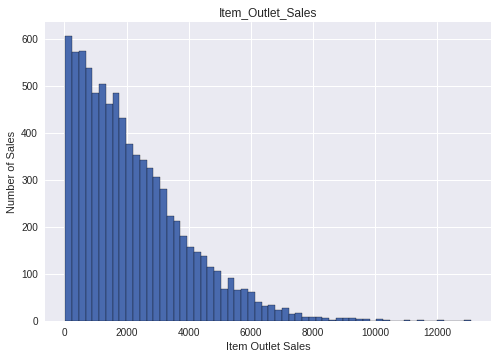

In [26]:
plt.style.use('seaborn')

df.hist(column='Item_Outlet_Sales', 
        edgecolor='black', 
        color='#496AAE',
        bins =  60)

plt.xlabel("Item Outlet Sales")
plt.ylabel("Number of Sales")
plt.show()

###### **Observation**

This is a right skewed or positively skewed histogram. Measures must be taken to change its skewedness and make its distribution normal.

#### Independent Variables

These are the independent numerical variables.

##### Item Weight

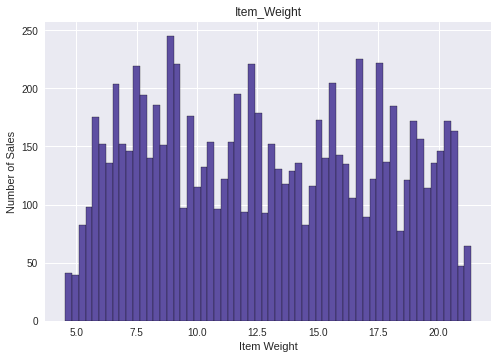

In [27]:
plt.style.use('seaborn')


df.hist(column='Item_Weight', 
        edgecolor='black', 
        color='#5E4FA2',
        bins =  60)

plt.xlabel("Item Weight")
plt.ylabel("Number of Sales")
plt.show()

##### Item Visibility

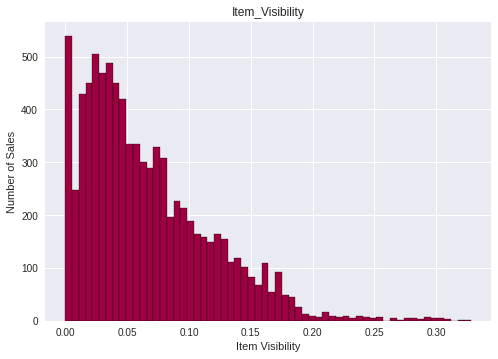

In [28]:
plt.style.use('seaborn')

df.hist(column='Item_Visibility', 
        edgecolor='black', 
        color='#9E0142',
        bins =  60)

plt.xlabel("Item Visibility")
plt.ylabel("Number of Sales")
plt.show()

##### Item Marked Price

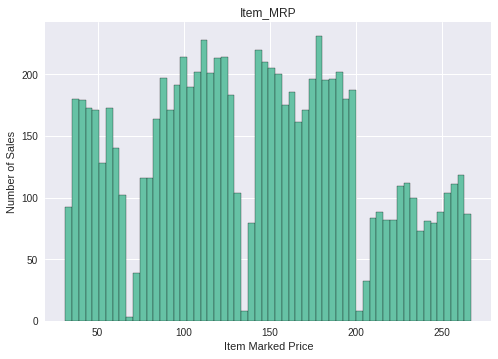

In [29]:
plt.style.use('seaborn')

df.hist(column='Item_MRP', 
        edgecolor='black', 
        color='#66C2A5',
        bins =  60)

plt.xlabel("Item Marked Price")
plt.ylabel("Number of Sales")
plt.show()

###### **Observation**

There is no distinct pattern seen in the `Item_Distribution` column.

`Item_Visibility` is positively skewed and has to be transformed in some way to do away with its skewed pattern.

For `Item_MRP`, there are 4 distinct sets of distribution.

### Boxplots



#### Multivariate Analysis

We shall visualise the categorical variables, which are variables or features that can only have a finite set of values, with respect to `Item_Outlet_Sales`. We will try to check the distribution of the target variable across all the categories of each of the categorical variable.

##### Item Type to  Item Outlet Sales


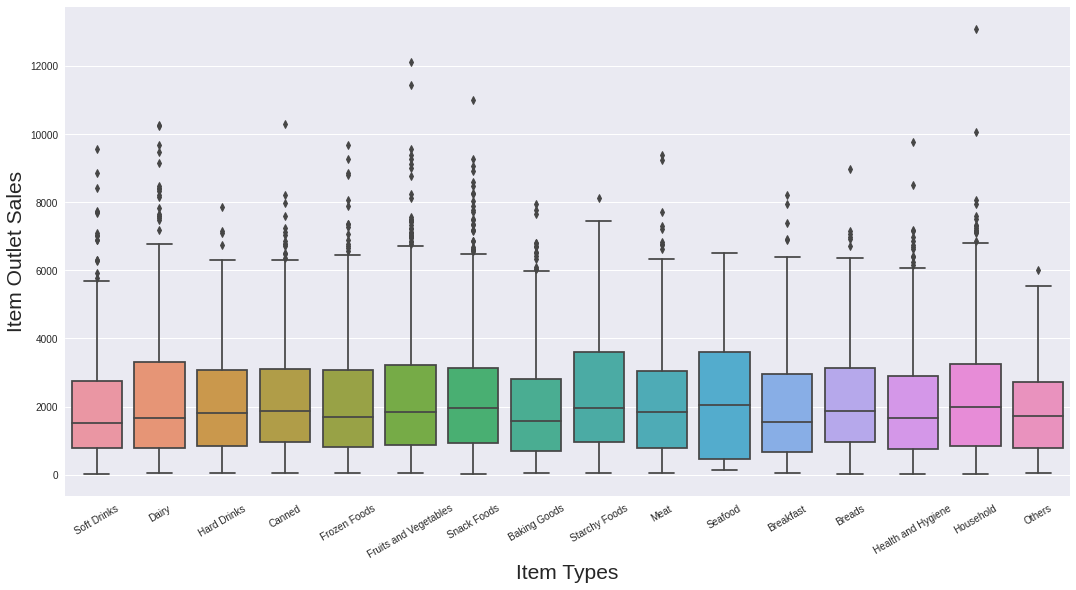

In [30]:
# To configure plot width and height
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,9))

Item_Type_BP = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data = df)

# To make labels diagonal

Item_Type_BP.set_xticklabels(Item_Type_BP.get_xticklabels(),rotation = 30)

# To label x and y axis
Item_Type_BP.set_xlabel('Item Types',
                     fontsize=21);
Item_Type_BP.set_ylabel('Item Outlet Sales',
                     fontsize=21);

plt.show()

##### Item Fat Content to Item Outlet Sales

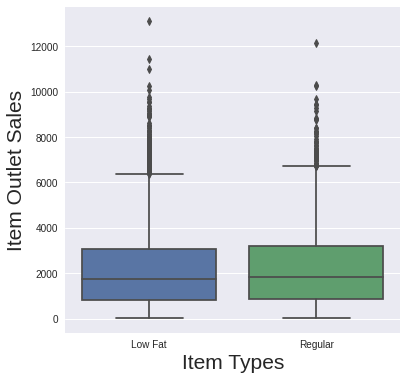

In [31]:
# To configure plot width and height
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))

Item_Fat_Content_BP = sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data = df)

# To label x and y axis
Item_Fat_Content_BP.set_xlabel('Item Types',
                     fontsize=21);

Item_Fat_Content_BP.set_ylabel('Item Outlet Sales',
                     fontsize=21);

plt.show()

##### Outlet Identifier to Item Outlet Sales

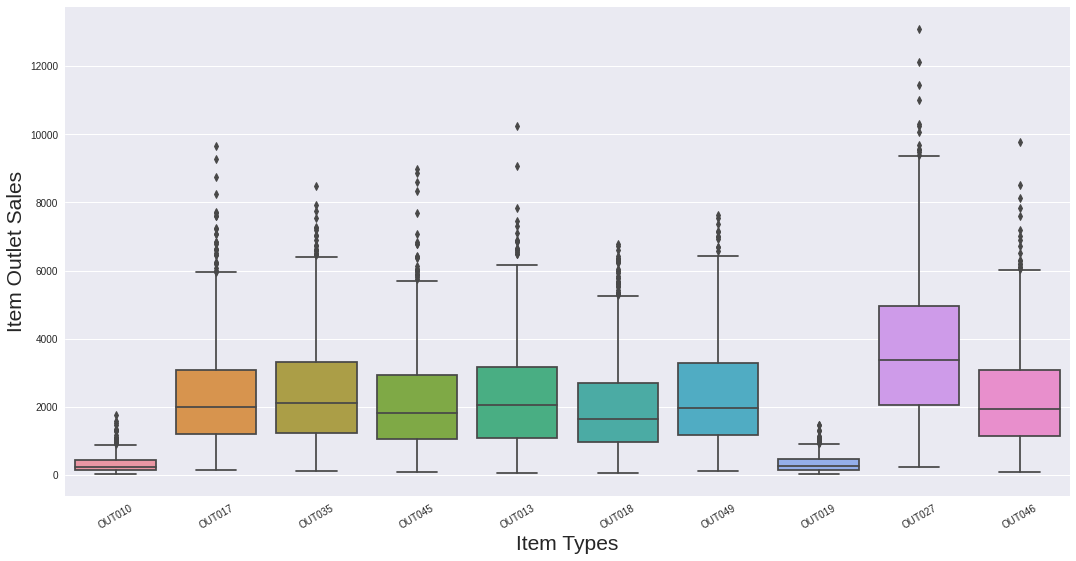

In [32]:
# To configure plot width and height
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,9))

Outlet_Identifier_BP = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data = df)

# To make labels diagonal

Outlet_Identifier_BP.set_xticklabels(Outlet_Identifier_BP.get_xticklabels(),rotation = 30)

# To label x and y axis
Outlet_Identifier_BP.set_xlabel('Item Types',
                     fontsize=21);
                     
Outlet_Identifier_BP.set_ylabel('Item Outlet Sales',
                     fontsize=21);

plt.show()

###### **Observation**

There is no distinction between the distribution of item sales across the categories of item type and item fat content.

Outlet 10 and Outlet 19 in the `Outlet_Identifiers` column are similar to each other as well as drastically different from the other items in the `Outlet_Identifiers` column.

#### Univariate Analysis


##### Outlet Size to Item Outlet Sales

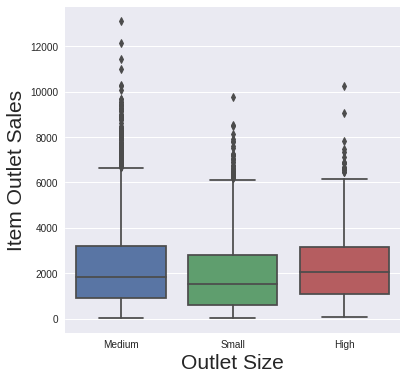

In [33]:
# To configure plot width and height
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))

Outlet_Size_BP = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data = df)

# To label x and y axis
Outlet_Size_BP.set_xlabel('Outlet Size',
                     fontsize=21);

Outlet_Size_BP.set_ylabel('Item Outlet Sales',
                     fontsize=21);

plt.show()

##### Outlet Location Type to Item Outlet Sales

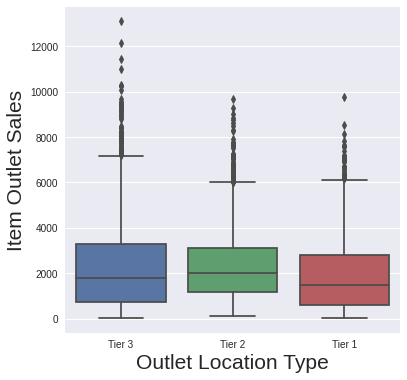

In [34]:
# To configure plot width and height
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))

Outlet_Location_Type_BP = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data = df)

# To label x and y axis
Outlet_Location_Type_BP.set_xlabel('Outlet Location Type',
                     fontsize=21);

Outlet_Location_Type_BP.set_ylabel('Item Outlet Sales',
                     fontsize=21);


##### Outlet Type to Item Outlet Sales

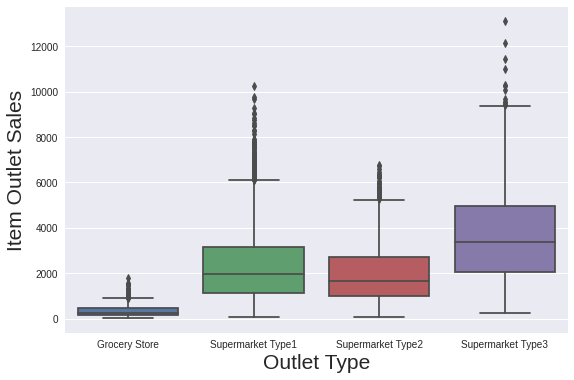

In [35]:
# To configure plot width and height
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (9,6))

Outlet_Type_BP = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = df)

# To label x and y axis
Outlet_Type_BP.set_xlabel('Outlet Type',
                     fontsize=21);

Outlet_Type_BP.set_ylabel('Item Outlet Sales',
                     fontsize=21);
                     

###### **Observation**

There is no distinct significance among the `Outlet_Size` category.

Tiers 1 and 3 of the `Outlet_Location_Type` category look similar.

As for the `Outlet_Types`, the Grocery Store variant has most of its values near bottom, or the point showing the least number of sales when compared to all Supermarket type categories.



### Heatmaps

#### Correlation Matrix

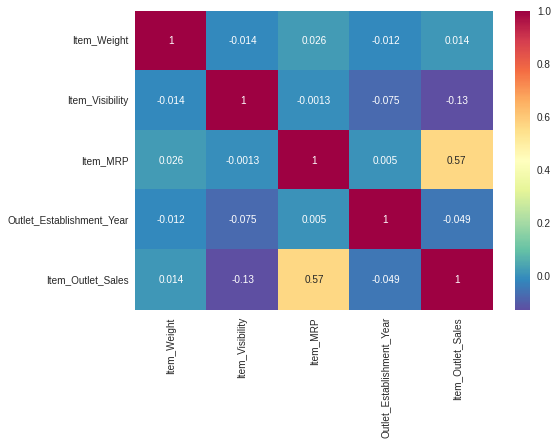

In [36]:
corr_mat = df.corr()

# To plot the correlation matrix

sns.heatmap(corr_mat, 
            annot = True, 
            cmap = 'Spectral_r')

plt.show()

##### **Observation**

There is a positive correlation between outlet sales and marked price (0.57 correlation coefficient).

However, there is weak correlation between the other variables.

### Explanatory Data Analysis

#### Comparing Different Factors


These are some of the charts for univariate categorical variables.



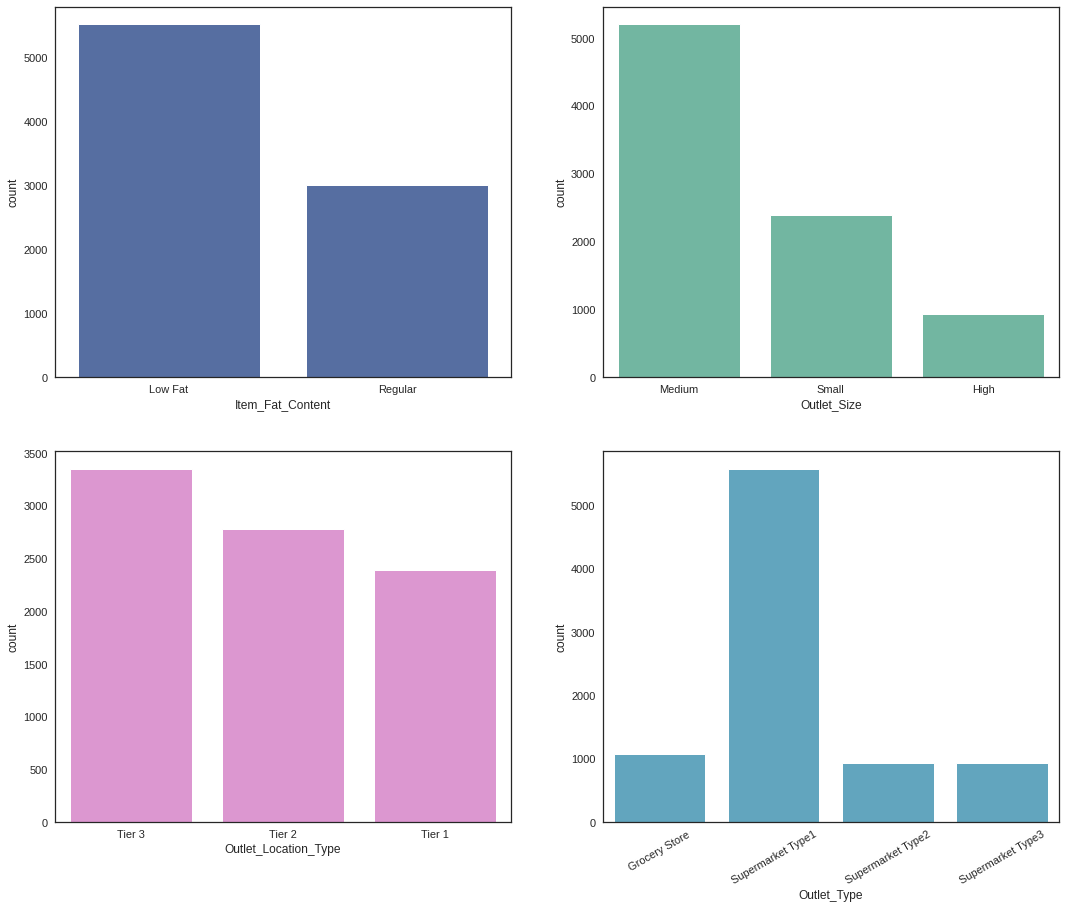

In [78]:
print('''
These are some of the charts for univariate categorical variables.
''')

# To create charts for univariate categorical variables of the dataset

# To set style 
plt.style.use('seaborn-white')

# For Item Fat Content column
plt.subplot(221)
sns.countplot(x=df['Item_Fat_Content'], color='#496AAE')
fig = plt.gcf()
fig.set_size_inches(18,15)


# For Outlet Size column
plt.subplot(222)
sns.countplot(x=df['Outlet_Size'], color='#66C2A5')
fig = plt.gcf()
fig.set_size_inches(18,15)


# For Outlet Location Type column
plt.subplot(223)
sns.countplot(x=df['Outlet_Location_Type'], color='#E78CD7')
fig = plt.gcf()
fig.set_size_inches(18,15)

# For Outlet Type column
plt.subplot(224)
sns.countplot(x=df['Outlet_Type'], color='#53ACCD')
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(rotation = 30)

plt.show()

##### Observations



*   Low fat items sell more than regular items.

*   Things are sold more in medium sized outlets while things are sold less in high outlet size types.

*   Tier 3 locations sell the most while Tier 1 locations sell the least.

*   Supermarket Type 1 sells the most while groceries and supermarket types 2 and 3 sell the same amount.




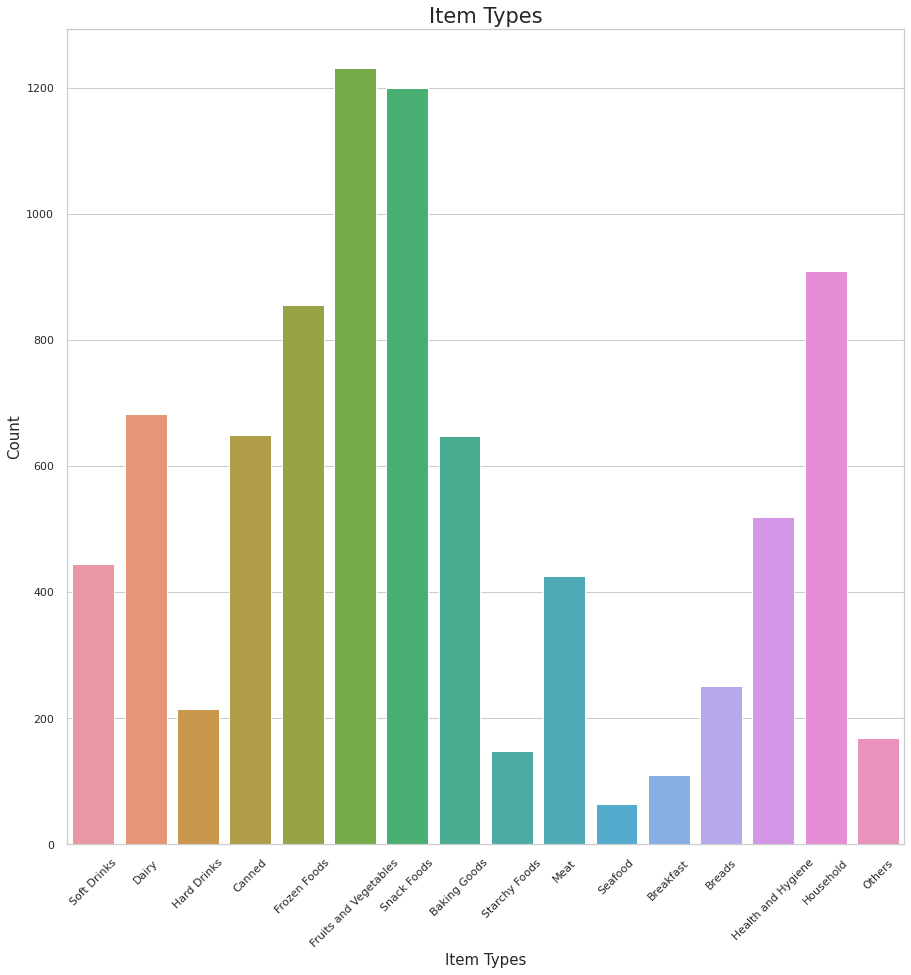

In [80]:
# To create histogram for Item_Types column

sns.set_theme(style='whitegrid', palette='Spectral_r')
sns.countplot(x=df['Item_Type'])
fig = plt.gcf()
fig.set_size_inches(15,15)

plt.xlabel('Item Types', fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 15)
plt.title("Item Types", fontsize = 21)

plt.show()

The kind of items that sell the most in stores are fruits and vegetables followed closely by snack foods. The kinds that sell the least are seafood, followed by breakfast items.

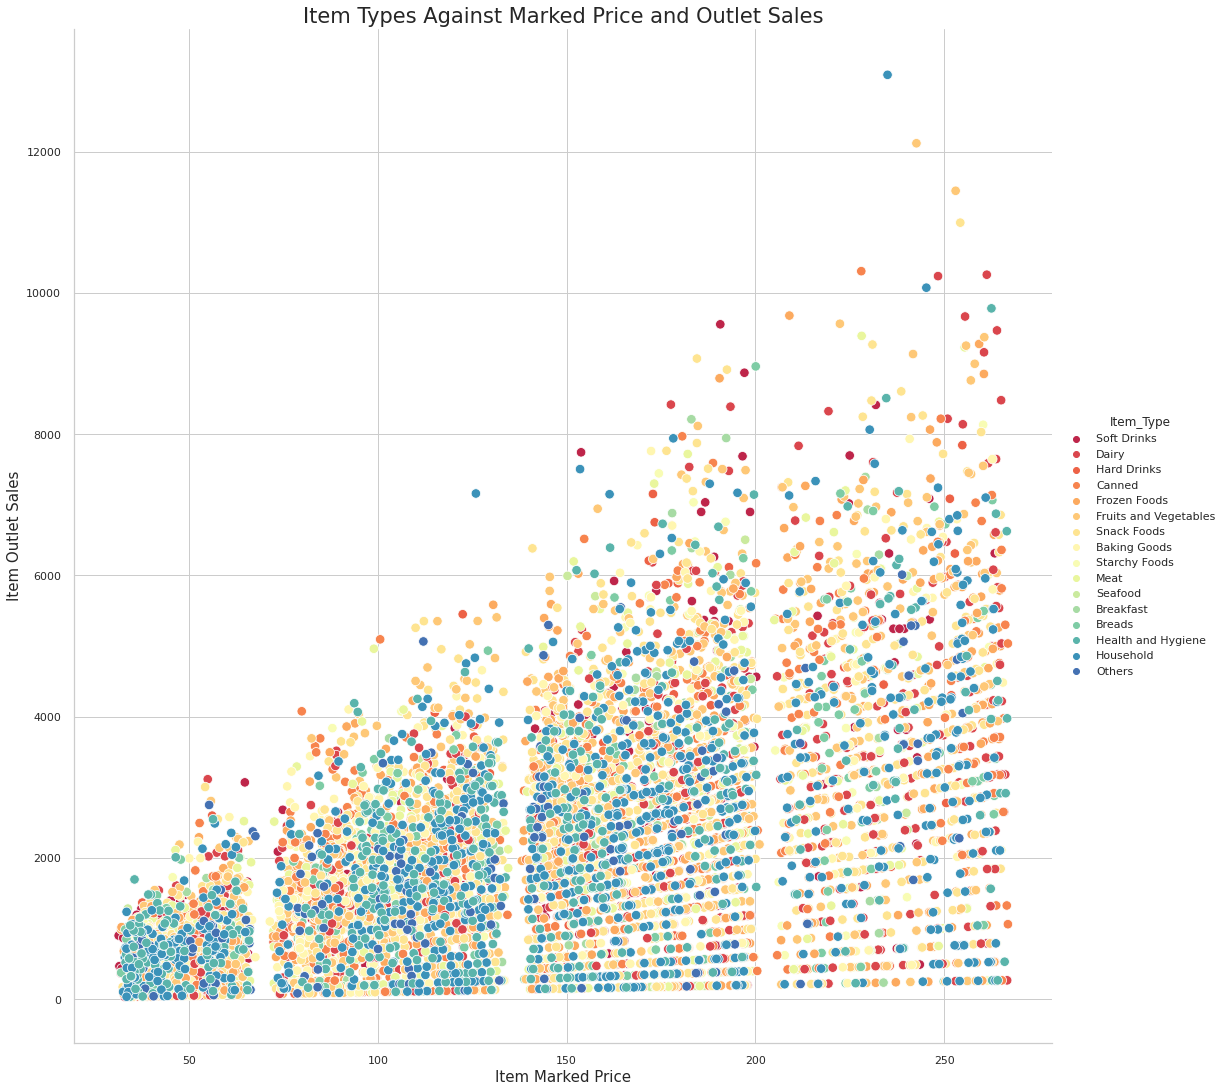

In [82]:
# To make scatter plot

sns.relplot(x='Item_MRP',
            y='Item_Outlet_Sales',
            hue='Item_Type',
            palette='Spectral',
            data = df,
            height = 15,
            s = 90)

plt.xlabel('Item Marked Price', fontsize = 15)
plt.ylabel('Item Outlet Sales', fontsize = 15)
plt.title('Item Types Against Marked Price and Outlet Sales', fontsize = 21)

plt.show()

Things that sell the most despite having a high price are Fruits and Vegetables, Snack Foods, Dairy Items, Canned Goods, Health and Hygiene items and Household Items.